# <center>Customer Credit Amount Prediction</center>

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [106]:
pd.set_option('display.max.column', 100)

## Data Load

In [107]:
dfCust = pd.read_csv('train.csv')

In [108]:
dfCust.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [109]:
#Check for duplicate rows
dfCust[dfCust.duplicated()]

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner


In [110]:
dfCust[dfCust.drop(columns=['serial number', 'credit_amount']).duplicated()]

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner


**Checkfor missing value**

In [111]:
dfCust.describe()

,serial number,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.00000,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,202.21688,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,1.00000,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,175.75000,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,350.50000,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,525.25000,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,700.00000,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


In [112]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

In [113]:
dfCust.isnull().sum() / dfCust.index.size * 100

serial number        0.000000
account_info        39.000000
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
credit_amount        0.000000
savings_account      0.000000
Saving Account      17.142857
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

Data in **Accout_info (39%) & Saving Account (17%)** is missing.<BR>
Imputing **~40%** of data is not good idea, so will drop this column.

In [114]:
dfCust.drop(columns='account_info', inplace=True)

In [115]:
grp = dfCust.groupby(by='savings_account')
grp[['Saving Account', 'Salary', 'investment','age']].mean()

,Saving Account,Salary,investment,age
savings_account,,,,
A61,50.644028,1627.135831,39.698361,34.997658
A62,301.896104,1586.688312,38.620000,33.467532
A63,765.976190,1720.952381,39.093095,35.904762
A64,2258.205882,1526.970588,40.680294,36.705882
A65,NaN,1550.183333,38.381000,37.075000


In [116]:
dfCust[dfCust['Saving Account'].isnull()]['savings_account'].value_counts()

A65    120
Name: savings_account, dtype: int64

It looks like **savings_account = A65** means saving account detail not provided.<BR>
So will impute 0 in **Saving Account**.

In [117]:
dfCust['Saving Account'] = dfCust['Saving Account'].fillna(value=0)

In [118]:
dfCust.isnull().sum()

serial number       0
duration_month      0
Loan                0
Regularity          0
Purpose             0
credit_amount       0
savings_account     0
Saving Account      0
employment_st       0
Salary              0
investment          0
Gender              0
Status              0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

## Visualising Data

In [119]:
qutVar = dfCust.columns[dfCust.dtypes != 'object']
catVar = dfCust.columns[dfCust.dtypes == 'object']
qutVar = qutVar.drop('serial number')

### Quantitative Variable Univariate & Bivariate Analysis

In [120]:
#sns.pairplot(data=dfCust)

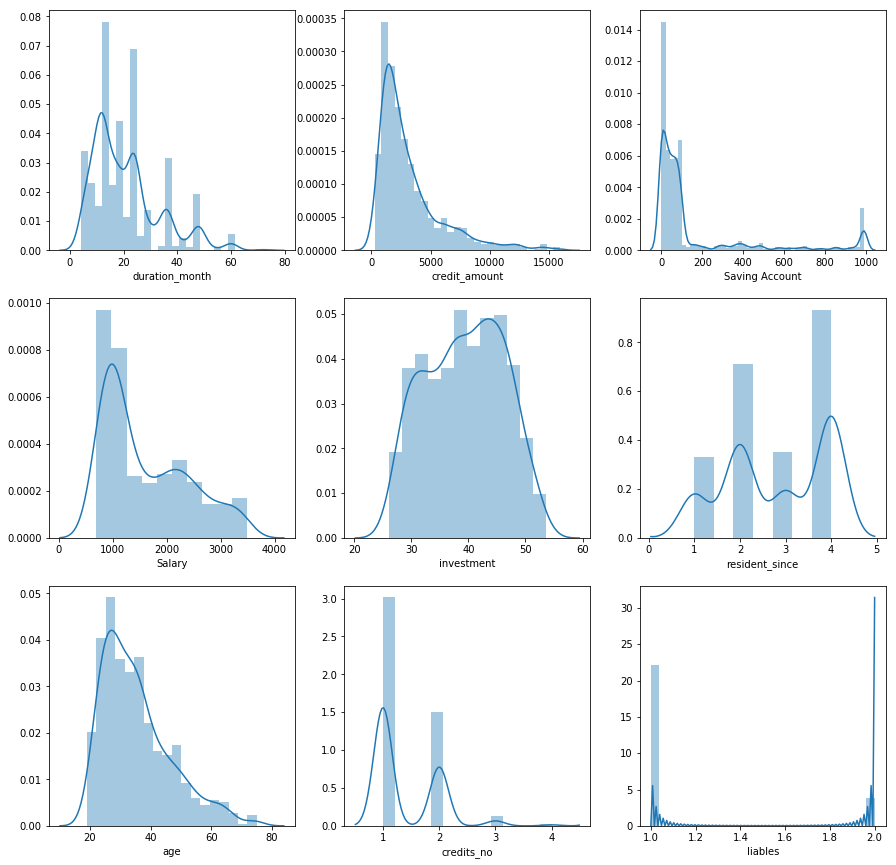

In [132]:
count = 1
plt.figure(figsize=(15,15))
for n in qutVar:
    plt.subplot(math.ceil(qutVar.size / 3), 3, count)
    sns.distplot(dfCust[n])
    count += 1

plt.show()

All variable are normally distributed except **Saving account** variable have high outliers.

In [122]:
dfCust[['Saving Account']].describe(percentiles=[.25,.5,.75,.9,0.95,.99,1])

,Saving Account
count,700.000000
mean,219.744286
std,527.785992
min,0.000000
25%,13.000000
50%,55.000000
75%,95.000000
90%,580.900000
95%,990.300000
99%,2661.390000


Lets cap Saving Account balance amount using 95 percentile value.

In [123]:
dfCust['Saving Account'] = dfCust['Saving Account'].apply(lambda x : 990.30 if x > 990.30 else x )

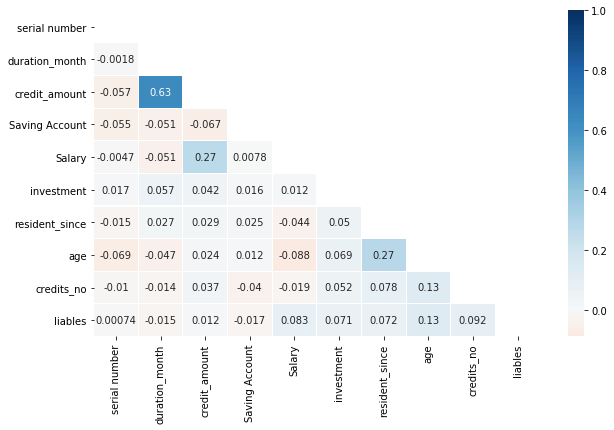

In [124]:
#Check correlation with heatmap
corr = dfCust.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='RdBu', annot=True,  mask=mask, center=0, linewidths= 0.1)
plt.show()

### Qualitative Variable Univariate & Bivariate Analysis

In [125]:
#Generic function to plot Bar chart for distribution of categorical variables
#Also compare Same categorical variable against credit amount using Box Plot

def PlotGraph(data, column, rows= 1, cols = 2, title='', figsize=(16,4), ticksRotation = 0, valueRotation = 0):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    #sortOrder = sorted(data1[column].unique(), key=sort_keys)
    plt1 = sns.barplot(data=data, x=column, y='credit_amount' ,ax=ax[0], estimator=lambda x: len(x) / len(data) * 100 )
    plt2 = sns.boxplot(data=data, x=column, y='credit_amount', ax=ax[1])

    if title == '':
        title = column + ' Distribution'

    fig.suptitle(title)
    ax[0].set_ylabel('Frequency (%)')
    ax[1].set_ylabel('Credit Amount')
        
    for i in range(0,len(ax)):
        plt.setp(ax[i].get_xticklabels(), rotation=ticksRotation)
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate('%.1f' % height + "%",(p.get_x() + 0.2, height + 0.2 + (valueRotation / 30)  ), rotation=valueRotation) 
    
    plt.show()

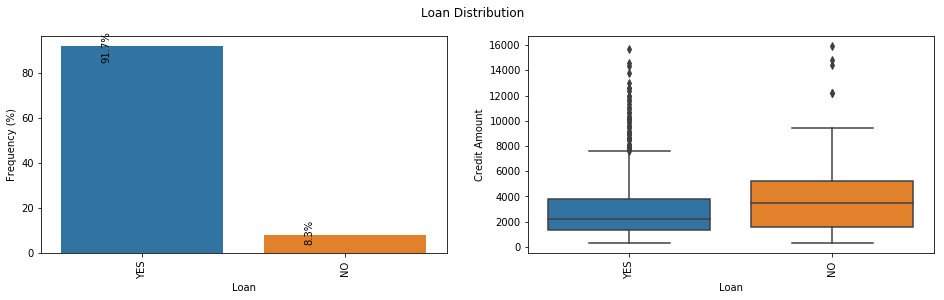

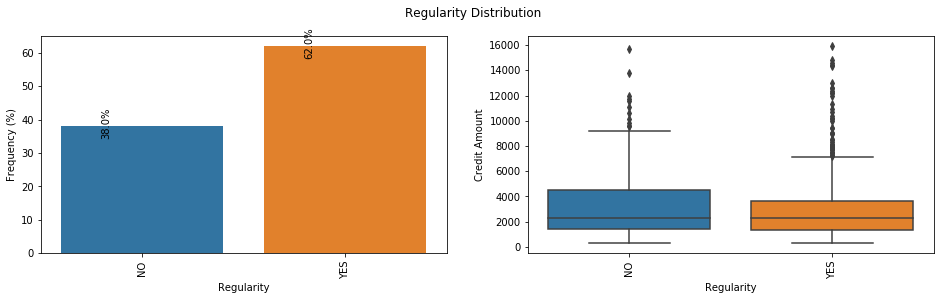

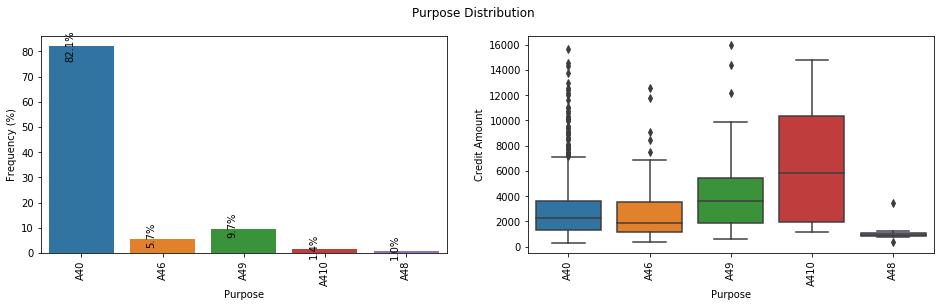

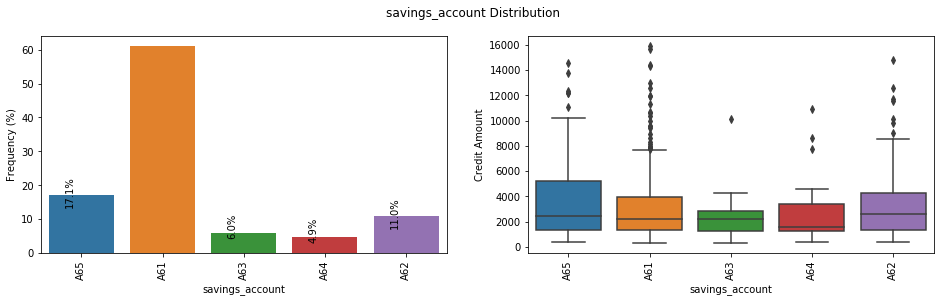

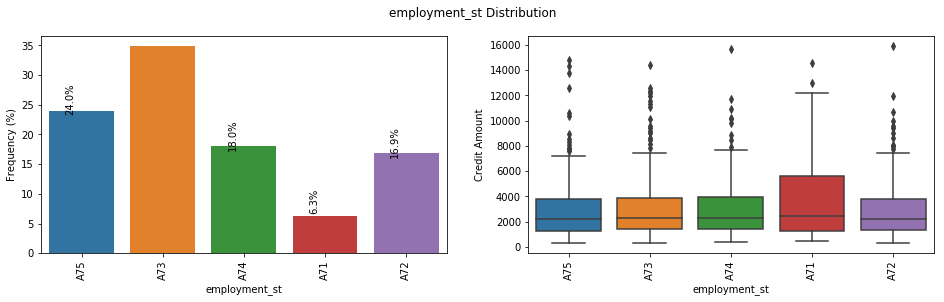

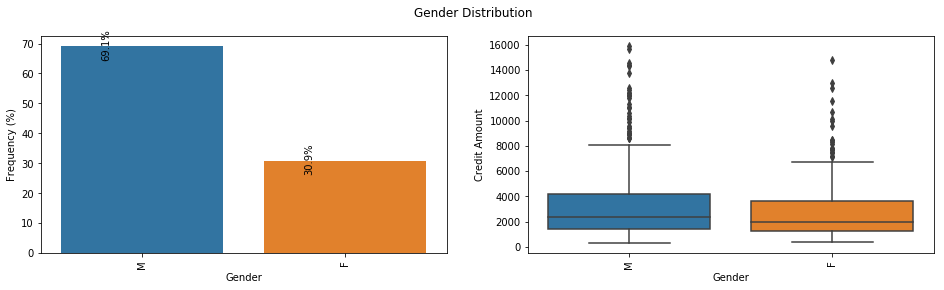

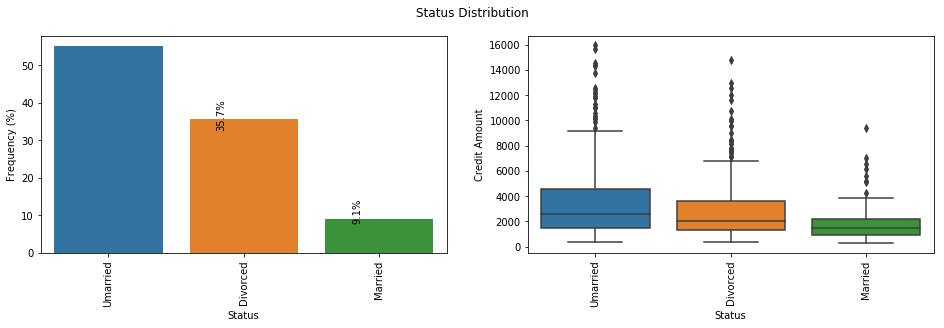

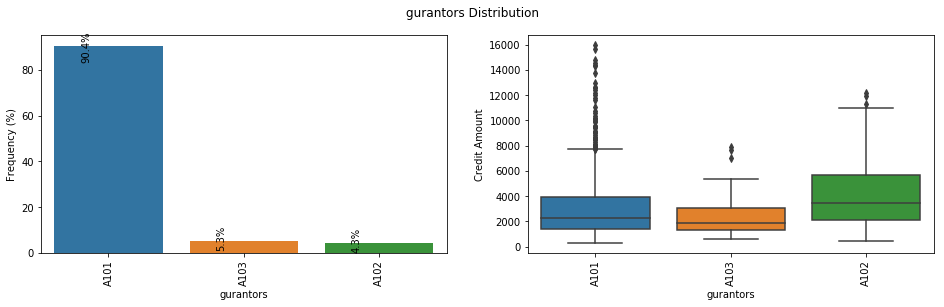

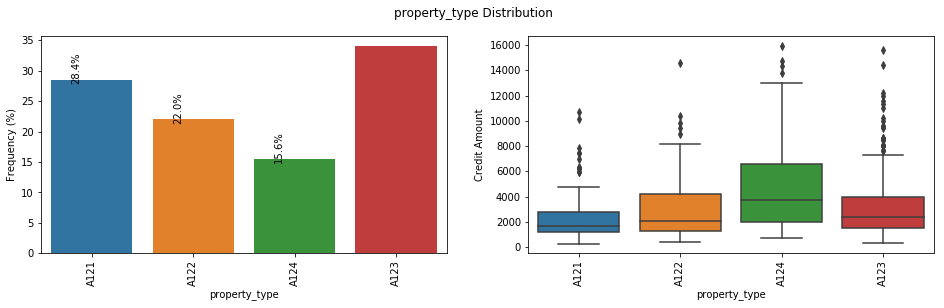

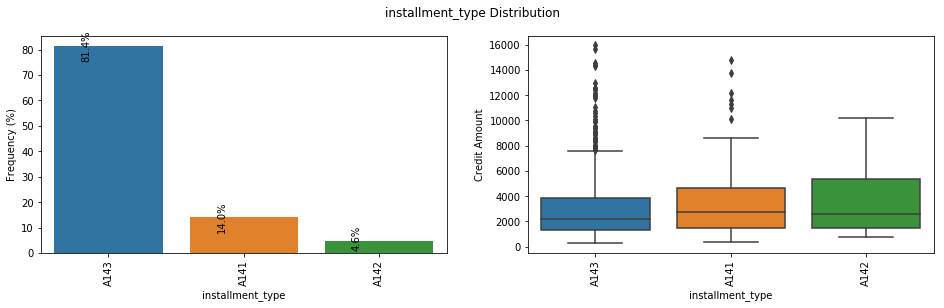

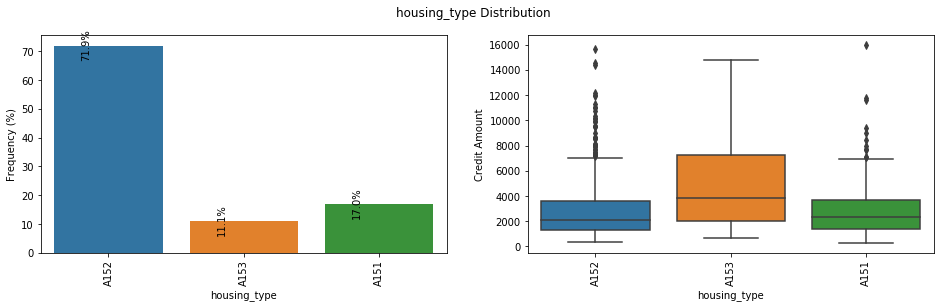

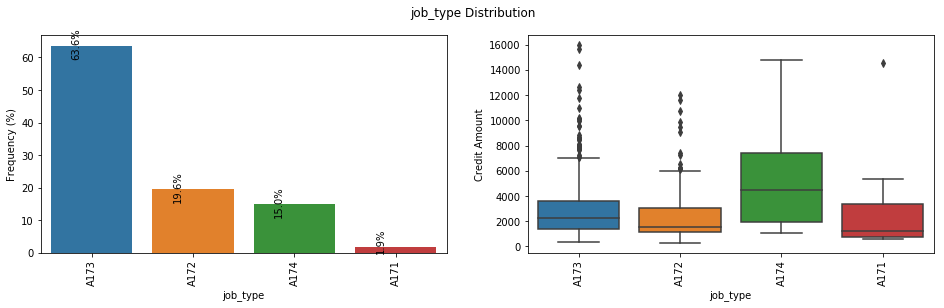

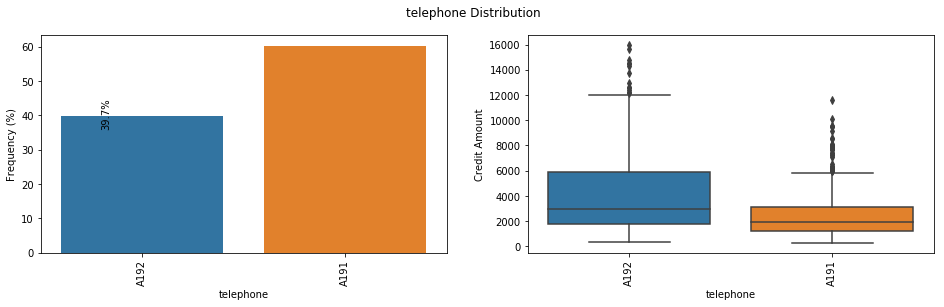

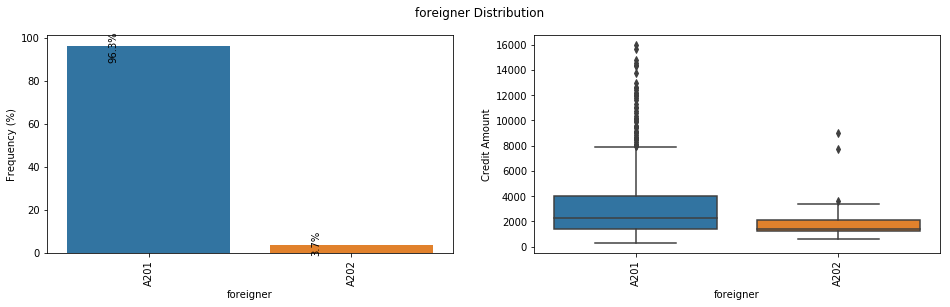

In [126]:
dummy = [PlotGraph(dfCust, col, ticksRotation=90, valueRotation=90) for col in catVar ]

<ul>
<li>**Loan**: Customer with no loans have highe cretid amount than customers having loan.</li>
<li>**Purpose**: Almost **82%** loans are taken to buy new car</li>
<li>**Foreigner**: 96% of customers are foreigner, means 96% data explained by this categorical value, so it looks this variable will not contribute much in predicting credict amount.</li>
</ul>

### Categorical Variable Dummification

In [155]:
def EncodingCategoricalData(df):
    data = df.copy()
    colToDrop = []
    colToDummification = []
    data['Loan'] = data['Loan'].apply(lambda x : 1 if str(x).lower() == 'yes' else 0)
    data['Regularity'] = data['Regularity'].apply(lambda x : 1 if str(x).lower() == 'yes' else 0)
    data['Gender_Male'] = data['Gender'].apply(lambda x : 1 if str(x).lower() == 'm' else 0)
    colToDrop.append('Gender')

    data['foreigner'] = data['foreigner'].apply(lambda x : 1 if str(x).lower() == 'a201' else 0)
    data['telephone_reg'] = data['telephone'].apply(lambda x : 1 if str(x).lower() == 'a191' else 0)
    colToDrop.append('telephone')

    #Employment status have some standared order like, unemployed , employed with les than year and so, will replace value accordingly
    employment_st ={'A71':1, #unemployed 
                    'A72':2, #employed for less than a year 
                    'A73':3, #employed for more than a year but less than four years 
                    'A74':4, #employed more than four years but less than seven years 
                    'A75':5} #employed for more than seven years
    data.replace({'employment_st' : employment_st}, inplace=True)

    #For Housing type there is inherent order based on housing expense 
    housing_type ={'A151':1, #housing is on rent 
                    'A152':2, #housing is owned by the applicant (loan present of housing)
                    'A153':3} #no loan amount is present on the housing and there is no expense for the housing)
    data.replace({'housing_type' : housing_type}, inplace=True)

    #Similar to housing type Job type also have some order based on there jobs and roles
    job_type ={'A171':1, #unemployed or unskilled and is a non-resident 
                    'A172':2, #unskilled but is a resident 
                    'A173':3, #skilled employee or official 
                    'A174':4} #involved in management or is self-employed or a highly qualified employee or officer
    data.replace({'job_type' : job_type}, inplace=True)

    #Purpose : More than 90% variance is covered by 2 cateory, so will merge other categories in single category "Other = A410"
    data['Purpose'] = data['Purpose'].apply(lambda x : x if str(x).lower() in ['a40', 'a49'] else 'A410')
    colToDummification.append('Purpose')
    colToDummification.append('Status')
    colToDummification.append('gurantors')
    colToDummification.append('property_type')
    colToDummification.append('installment_type')
    colToDummification.append('savings_account')

    #Column dummification and remove original column
    for c in colToDummification:
        tempDf = pd.get_dummies(data[c], drop_first=True, prefix=c)
        data = pd.concat([data, tempDf], axis=1)
        colToDrop.append(c)

    data.drop(columns=colToDrop, inplace=True)
    
    return data

In [156]:
dfCust_final = EncodingCategoricalData(dfCust)

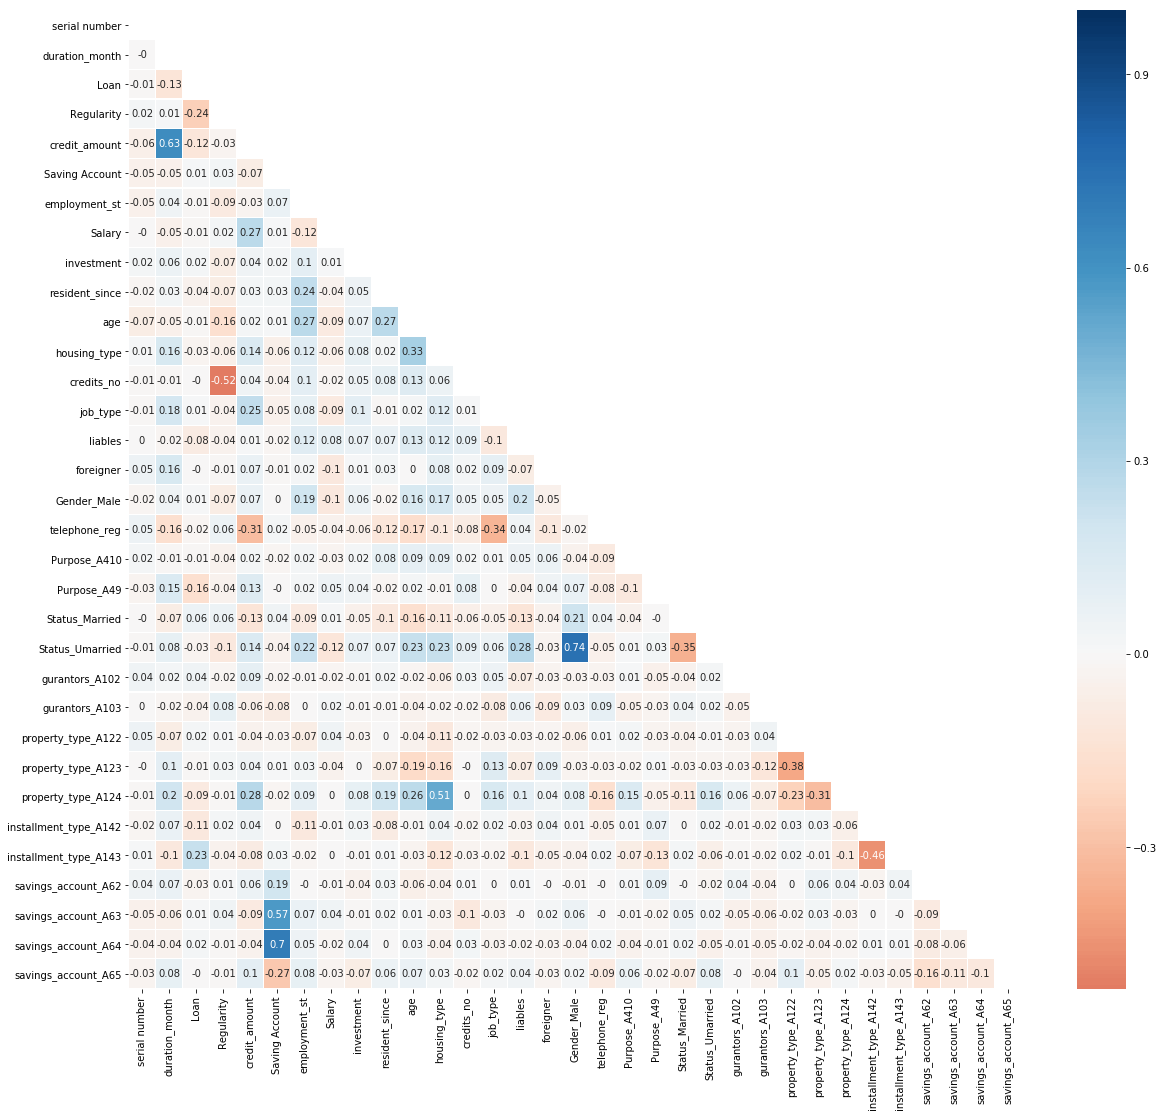

In [157]:
#Check correlation with heatmap
corr = round(dfCust_final.corr(), 2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap='RdBu', annot=True,  mask=mask, center=0, linewidths= 0.1)
plt.show()

No high correlation between variable.

## Model Building

In [175]:
#Model Algo
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
import statsmodels.api as sm

#Util
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#Model Evluation
from sklearn.metrics import mean_squared_error

In [184]:
# Putting feature variable to X
X = dfCust_final.drop(columns=['serial number', 'credit_amount'])
# Putting response variable to y
Y = dfCust_final['credit_amount']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

In [209]:
colsToScale = ['duration_month', 'Saving Account', 'Salary', 'investment', 'age']
sc = StandardScaler()
X_train[colsToScale] = sc.fit_transform(X_train[colsToScale])
X_test[colsToScale] = sc.transform(X_test[colsToScale])

### Feature Selection
Will use RFE (recursive Feature Elimination) technic to select most important features from **31** different available features.

In [187]:
#Create Linear Regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
#Use above create LR model as estimator to rfe 
rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)
dfRFE = pd.DataFrame(data=np.array([X_train.columns,rfe.support_,rfe.ranking_, ]).T, columns=['Feature', 'Support', 'Rank'])
dfRFE.sort_values(by='Rank')

,Feature,Support,Rank
0,duration_month,True,1
28,savings_account_A63,True,1
24,property_type_A124,True,1
23,property_type_A123,True,1
21,gurantors_A103,True,1
20,gurantors_A102,True,1
19,Status_Umarried,True,1
18,Status_Married,True,1
17,Purpose_A49,True,1
29,savings_account_A64,True,1


In [230]:
features = list(dfRFE[dfRFE['Support']]['Feature'])

** Generic Method to get LR Model & VIF score **

In [190]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return (lr, X_train_lm)

In [191]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i), 2) for i in range(df.shape[1])]
    vifScore = vifScore.sort_values(by = "VIF", ascending = False)
    return vifScore

In [342]:
def EvaluateModel(y_true, y_pred, norm_factor = 100000, onlyPrint = True):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    normalized_rmse = (1 - rmse / norm_factor) * 100
    
    if onlyPrint:
        print("Root Mean Squared Error : ", rmse)
        print("Normalized Root Mean Squared Error : ", normalized_rmse)
    else:
        return (rmse, normalized_rmse)

Lets build model using OLS algorithm

In [237]:

lr_1, train_lm_1 = GetLRModel(X_train[features], y_train)
EvaluateModel(y_train, lr_1.predict(train_lm_1))
EvaluateModel(y_test, lr_1.predict(sm.add_constant(X_test[features])))

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     42.22
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           1.40e-96
Time:                        21:21:51   Log-Likelihood:                -4946.9
No. Observations:                 560   AIC:                             9936.
Df Residuals:                     539   BIC:                         1.003e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3771.5530    

In [264]:
features.remove('Loan')

In [269]:
lr_1, train_lm_1 = GetLRModel(X_train[features], y_train)
EvaluateModel(y_train, lr_1.predict(train_lm_1))
EvaluateModel(y_test, lr_1.predict(sm.add_constant(X_test[features])))

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     82.99
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          5.32e-103
Time:                        21:28:35   Log-Likelihood:                -4952.9
No. Observations:                 560   AIC:                             9928.
Df Residuals:                     549   BIC:                             9975.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2564.5089    

In [270]:
GetVIFScore(X_train[features])

,Features,VIF
9,employment_st,8.52
2,job_type,8.44
4,Status_Umarried,2.44
3,telephone_reg,2.26
6,property_type_A123,1.75
7,property_type_A124,1.46
8,savings_account_A65,1.28
0,duration_month,1.09
5,gurantors_A102,1.06
1,Salary,1.02


In [246]:
EvaluateModel(y_train, lr_1.predict(train_lm_1))
EvaluateModel(y_test, lr_1.predict(sm.add_constant(X_test[features])))

Root Mean Squared Error :  1663.1869380399837
Normalized Root Mean Squared Error :  98.33681306196002
Root Mean Squared Error :  2102.537543112536
Normalized Root Mean Squared Error :  97.89746245688747


In [341]:
lr = LinearRegression()
lr.fit(X_train[features], y_train)
EvaluateModel(y_train, lr.predict(X_train[features]))
EvaluateModel(y_test, lr.predict(X_test[features]), returnValue=True)

Root Mean Squared Error :  1678.3762711034908
Normalized Root Mean Squared Error :  98.32162372889651
Root Mean Squared Error :  2115.8762728561333
Normalized Root Mean Squared Error :  97.88412372714387


(2115.8762728561333, 97.88412372714387)

### Ridge Regression

In [277]:
newFeature = list(dfRFE[dfRFE['Support']]['Feature'])

In [321]:
count = 0

In [343]:
def CustomRMSEScore(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return EvaluateModel(y_test, y_pred, onlyPrint=False)[1]

In [382]:
ridge = Lasso()
folds = KFold(n_splits=5, shuffle=True, random_state=100)
#Alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 20,21,22,25,28,30,32,35, 50, 100, 200, 500 ]}

model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= CustomRMSEScore, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_ridge.fit(X_train[newFeature], y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 20,
                                   21, 22, 25, 28, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=<function CustomRMSEScore at 0x0000013D1F672510>,
             verbose=1)

In [383]:
ridgeDF = pd.DataFrame(data = model_ridge.cv_results_)
ridgeDF[['param_alpha', 'mean_train_score', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

,param_alpha,mean_train_score,mean_test_score
22,10,98.346171,98.270175
23,11,98.345104,98.270136
21,9,98.347136,98.270101
20,8,98.348001,98.269906
19,7,98.348772,98.269730
18,6,98.349444,98.269487
24,20,98.334526,98.269482
25,21,98.333276,98.269213
17,5,98.350042,98.269145
26,22,98.332008,98.268863


In [384]:
model_ridge.best_params_

{'alpha': 10.0}

In [391]:
ridge = Ridge(alpha=25)
ridge.fit(X_train[newFeature], y_train)
EvaluateModel(y_train, ridge.predict(X_train[newFeature]))
EvaluateModel(y_test, ridge.predict(X_test[newFeature]))


Root Mean Squared Error :  1669.874686146209
Normalized Root Mean Squared Error :  98.33012531385378
Root Mean Squared Error :  2117.529881882793
Normalized Root Mean Squared Error :  97.8824701181172


In [386]:
ridge = Lasso(alpha=10)
ridge.fit(X_train[newFeature], y_train)
EvaluateModel(y_train, ridge.predict(X_train[newFeature]))
EvaluateModel(y_test, ridge.predict(X_test[newFeature]))


Root Mean Squared Error :  1665.8604001144963
Normalized Root Mean Squared Error :  98.3341395998855
Root Mean Squared Error :  2107.8260129287173
Normalized Root Mean Squared Error :  97.89217398707129


In [390]:
ridge.coef_

array([1600.08284353, -269.47022512, -182.43647317, -167.21986909,
        786.89542547, -122.13260546,  293.47572857,  -85.69180133,
          0.        , -723.57727856,  135.68578214, -204.73378888,
        589.10626588,  690.40410413, -110.70129628,  292.08869666,
        685.07546866, -156.65915631,   49.70191145,  286.24045004])

In [394]:
newFeature

['duration_month',
 'Loan',
 'Regularity',
 'employment_st',
 'Salary',
 'housing_type',
 'job_type',
 'liables',
 'Gender_Male',
 'telephone_reg',
 'Purpose_A49',
 'Status_Married',
 'Status_Umarried',
 'gurantors_A102',
 'gurantors_A103',
 'property_type_A123',
 'property_type_A124',
 'savings_account_A63',
 'savings_account_A64',
 'savings_account_A65']

In [392]:
ridge.coef_

array([1546.33783229, -274.964355  , -185.83448272, -167.22240726,
        761.99033718, -102.3005829 ,  321.27125938, -116.74840028,
        154.641767  , -659.1626472 ,  173.54036429, -322.29194488,
        440.60290183,  460.06214908, -176.65954029,  263.4454783 ,
        583.51116861, -197.96869935,  119.99311791,  288.51004442])

In [285]:
ridgeDF = pd.DataFrame(data = model_ridge.cv_results_)
ridgeDF[['param_alpha', 'mean_train_score', 'mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-2.722272e+06,-3.074397e+06
1,0.001,-2.722272e+06,-3.074390e+06
2,0.01,-2.722272e+06,-3.074312e+06
3,0.05,-2.722272e+06,-3.073970e+06
4,0.1,-2.722274e+06,-3.073546e+06
5,0.2,-2.722282e+06,-3.072710e+06
6,0.3,-2.722294e+06,-3.071891e+06
7,0.4,-2.722311e+06,-3.071087e+06
8,0.5,-2.722333e+06,-3.070299e+06
9,0.6,-2.722359e+06,-3.069525e+06
